# 모듈

## 모듈 만들기

In [1]:
# 모듈 만들기 - mod1.py
# def add(a, b): 
#     return a + b
# def sub(a, b):
#     return a - b

In [2]:
import mod1
print(mod1.add(11,22))
print(mod1.sub(33,22))

5
2
33
11


In [3]:
with open("mod2.py","w") as f:
    data="""def mul(a,b):
        return a*b
def div(a,b):
    return a/b"""
    f.write(data)

In [4]:
import mod2
print(mod2.mul(3,4))
print(mod2.div(8,4))

12
2.0


In [5]:
# import mod1 as m1
# import mod2 as m2
import mod1 as m1, mod2 as m2
print(m1.add(11,22))
print(m1.sub(33,22))
print(m2.mul(3,4))
print(m2.div(8,4))

33
11
12
2.0


In [6]:
from mod1 import add , sub
print(add(33,44))

77


In [7]:
from mod2 import * 
print(mul(4,5))

20


## `__main__` 의 의미

In [8]:
with open("mod1.py","a") as f:
     text = """\nprint(add(1,4))\nprint(sub(4,2))"""
     f.write(text)

In [9]:
%%cmd
python mod1.py

Microsoft Windows [Version 10.0.26100.3194]
(c) Microsoft Corporation. All rights reserved.

D:\lyb\code>python mod1.py
5
2
5
2

D:\lyb\code>

매직커멘드
- %%bash : 리눅스
- %%cmd : 윈도우

In [10]:
import mod1
dir(mod1)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add',
 'sub']

In [11]:
import sam
sam.sam('삼성물산')

ModuleNotFoundError: No module named 'sam'

## 클래스나 변수 등을 포함한 모듈

In [ ]:
with open("mod3.py","w") as f:
    text = """PI = 3.141592\n\nclass Math:\n\tdef solv(self,r):\n\t\treturn PI * (r**2)\n\ndef add(a,b):\n\treturn a+b"""
    f.write(text)

In [ ]:
%%cmd
set PYTHONPATH=D:\lyb\code

- CMD 에서 set PYTHONPATH= D:\lyb\code\mymod
- PS 에서 $env:PYTHONPATH= D:\lyb\code\mymod

In [ ]:
import mod3
# 변수
print(mod3.PI)
# 클래스
a = mod3.Math()
print(a.solv(10))
# 함수
print(mod3.add(mod3.PI, 4.4))

## 다른 디렉터리에 있는 모듈 불러오는 방법

In [ ]:
import sys
sys.path

In [ ]:
sys.path.append('D:\\lyb\\code\\mymod>') # 초기화하면 사라짐
sys.path

In [ ]:
# !python.exe -m pip install --upgrade pip
# ! pip install python-dotenv

In [ ]:
from dotenv import load_dotenv
import os 

# .env 파일 로드
load_dotenv()

SKEY = os.getenv("SECRET_KEY")
print(SKEY)
DBUG = os.getenv("DEBUG")
print(DBUG)
TEST = os.getenv("TEST")
print(TEST)

In [ ]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
from dotenv import load_dotenv
import json

load_dotenv()
client_id = os.environ.get("MY_ID")
client_secret = os.environ.get("MY_SECRET")

encText = urllib.parse.quote("속보")
url = "https://openapi.naver.com/v1/search/news.json?query=" + encText +'&display=10&start=2&sort=sim' # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    result = response_body.decode('utf-8')
    data = json.loads(result)
    ldata = data['items']
    for n in ldata:
        print(n['title'].replace('<b>','').replace('</b>',''))
        print(n['description'])
        print(n['originallink'])
    
else:
    print("Error Code:" + rescode)

In [ ]:
print(ldata)

In [ ]:
# p1 입력을 하면 그 단어가 거꾸로 해도 같은 단어인지 확인하는 프로그램을 만들어라.
list = ['우영우', '인도인', '파이썬']
word = input('단어를 입력하세요:')

list = True
for i in range(len(word) // 2):
    if word[i] != word[-1 - i]:
        list = False
        break

print(list)
# 같은 단어이면 True, 다르면 False입니다.

In [ ]:
# p2 하나의 긴 리스트값을 입력하면 두개의 리스트로 결과가 나오는데 각각 짝수의 값이 담기고 홀수의 값이 담기도록 한다. 
num = [1,2,3,4,5,6,7,8,9,10.11,12,13,14,15,16,17,18,19,20]
result1 = []
result2 = []
for n in range(0,20,2):
    if n % 2 == 0: 
        result1.append(n)
for n in range(1,20,2):
    if n % 2 == 1: 
        result2.append(n)
print(num)
print(f' 짝수 리스트는 {result1}입니다.')
print(f' 홀수 리스트는 {result2}입니다.')

In [ ]:
# p3 하나의 긴 문장을 입력받았을 때 그 문장 중에 가장 긴 단어를 밖으로 출력하게 하세요. (긴 글자가 하나이상 있으면 그 글자 모두)
def find_longest_word(sentence):
    words = sentence.split()
    return max(words,key=len)
text = input("문장을 입력하세요")
print("Longest word:",find_longest_word(text))

In [ ]:
# p4 입력을 받은 문장을 분류하여라.
def word():
    positive_words = ["좋아","행복","멋져","최고","사랑해"]
    negative_words = ["싫어","화나","짜증","별로","나빠"]
    pos = set("=".join("".join(positive_words)).split('='))
    neg = set("=".join("".join(negative_words)).split('='))
    text = input("단어를 입력해주세요")
    text2 = set("=".join("".join(text.split())).split("="))
    if pos.intersection(text2):
        return "기분이 좋아보이네요"
    elif neg.intersection(text2):
        return "기분이 나빠보이네요"
    else:
        return "평범한 하루네요"
word()

In [ ]:
# p5 영어 소문자로 문장을 입력받으면 매 첫글자만 대문자로 변경되게 하라. 문징의 마지막은 마침표를 찍어라.
original_string = input('영어 문장을 입력하세요.')
capitalized_string = original_string.title()
print(capitalized_string)

In [ ]:
# ! pip install qrcode

In [ ]:
import qrcode

def qrcode_maker(text, filename='qr.png'):
    qr = qrcode.make(text)
    qr.save(filename)

qrcode_maker('안녕하세요. 누구입니다!! ^^')
# qrcode_maker('www.naver.com', 'naver.png')
# qrcode_maker('www.daum.net', 'daum.png')

In [ ]:
from IPython.display import display, HTML
from PIL import Image

image_path = "qr.png"
img = Image.open(image_path)
htmlcode = '<img src="qr.png" width=200>'
display(HTML(htmlcode))
# display(img)

In [ ]:
import requests
import json

url = "http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=86c5204088a51e4d9a9e26141ed5b4e5&targetDt=20250216"
res = requests.get(url)
text = res.text

d = json.loads(text)

for b in d['boxOfficeResult']['dailyBoxOfficeList']:
    print(b['rank'],b['movieNm'],b['audiCnt'])

# 패키지

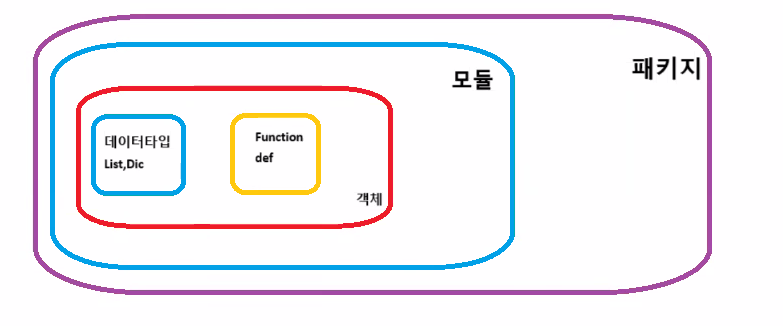 

## 패키지 만들기

In [ ]:
# %%cmd
# set PYTHONPATH=D:\lyb\code\game

In [ ]:
# 테스트 1 명시적이다. 그렇지만 길다.
import game.sound.echo
import game.graphic.render
game.sound.echo.echo_test()
game.graphic.render.render_test()

In [ ]:
# 짧지만 중복의 위험이 있다. 그리고 명시적이진 않다. 
from game.echo_v import echo_test as ev
from game.echo import echo_test as e
ev()
e()

In [ ]:
# __init__.py를 사용하기
import game
print(game.VERSION)
game.print_version_info()

In [ ]:
# __init__.py은 한번만 로드됨
import game

In [ ]:
# __init__.py는 패키지내에 내 모듈을 미리 import 할 수 있다. 
game.render_test()

In [ ]:
import game.graphic

In [ ]:
game.graphic.print_version_info()

In [15]:
# __all__ 사용하기
from game.graphic import * 

In [16]:
echo.echo_test()

비디오에코


In [1]:
# relative 패키지
from game.graphic.render import render_test

Initalizing Game...


In [3]:
# 비디오 에코가 아닌 사운드 에코 호출
render_test()

랜더링
에코


# 예외 처리

## 오류발생
- 오타
- 존재하지않는 파일을 지정 또는 사용
- 문법 오류
- 수학적 오류
- 인덱스 오류
## 오류 예외 처리 기법
- try-except 문
- try-finally 문
- 여러개의 오류 처리
- try-else 문

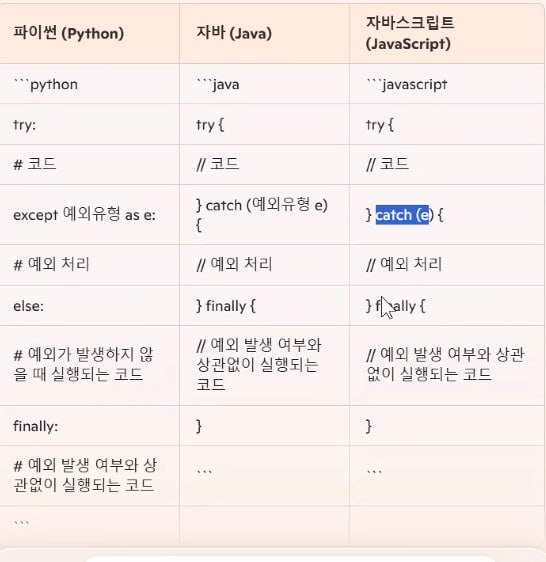

In [1]:
# f = open('뜬금파일','r')
# FileNotFoundError : [Errno 2] No such file or directory: '뜬금파일'

In [2]:
# 4/0
# ZeroDivisionError: division by zero

In [ ]:
# a = [1,2,3]
# print(a[7])
# IndexError: list index out of range

In [4]:
# 테스트 1 
try: 
    f = open('뜬금파일','r')
except FileNotFoundError as e:
    if e:
        print('없는거 찾지마, 혼자있고싶어.')
    print(e)
finally:
    print('코드 작성을 마칩니다.')

없는거 찾지마, 혼자있고싶어.
[Errno 2] No such file or directory: '뜬금파일'
코드 작성을 마칩니다.


In [12]:
# 지정한 이름의 예외처리, as로 별칭가능.
try: 
    4/0
except ZeroDivisionError as e:
    print('0으로 나눌 수 없어요',e)

0으로 나눌 수 없어요 division by zero


In [13]:
# try-except-finally 3단계로 가능, finally는 에러가나도 무조건 처리하는 것(여기서는 파일 닫기)
try:
    f = open('foo.txt','w')
    f.write(4/0)
except:
    print("0으로 나누지 마세요")
finally: 
    f.close()

0으로 나누지 마세요


In [14]:
# 테스트 해볼것 2개 이상의 오류를 동일하게 처리
try:
    a = 1,2
    print(a[512])
    4/0
except (ZeroDivisionError, IndexError) as e:
    print(e)

tuple index out of range


In [20]:
# try-else 문
try: 
    age = int(input("나이를 입력하세요"))
except:
    print("입력이 정확하지 않습니다.")
else:
    if age <= 18:
        print('미성년자는 출입금지')
    else:
        print('환영합니다.')
finally:
    print('='*20+'\n분석끝.')

나이를 입력하세요 27


환영합니다.
분석끝.


In [22]:
# try-else 문 생략
try:
    age = int(input("나이를 입력하세요"))
    if age <= 18:
        print('미성년자는 출입금지')
    else:
        print('환영합니다.')
except:
    print("입력이 정확하지 않습니다.")
finally:
    print('='*20+'\n분석끝.')

나이를 입력하세요 11


미성년자는 출입금지
분석끝.


In [21]:
# 오류 회피하기
try: 
    print('반가워')
    f = open('없는파일','r')
    4/0
    print('안녕')
except FileNotFoundError:
    pass

반가워


In [ ]:
# 오류 일부러 발생시키기 (클래스 상속기반)
class Bird:
    def fly(self):
        raise NotImplementedError

class Eagle(Bird):
    # pass
    def fly(self):
        print('난 독수리다')

eagle = Eagle()
eagle.fly()

In [36]:
# 예외 만들기
class MyError(Exception):
    pass

In [37]:
def say_nick(nick):
    if nick == '바보':
        raise MyError()
    print(nick)

In [38]:
say_nick("바보")

MyError: 

In [42]:
try:
    say_nick("천사")
    say_nick("바보")
except MyError as e:
    print("욕하지마 바보아냐, 그래도 사람은 착해",e)

천사
욕하지마 바보아냐, 그래도 사람은 착해 


In [43]:
class MyError(Exception):
    def __str__(self):
        return "욕하지마 그래도 사람은 착해"